# Question:
#### Q1. Build a MLP architecture with two or more hidden layers
* Use any open data set from kaggle or public forum
* Perform train, validation and test split of data set
* Compute the cost for all epochs and plot (either MSE or accuracy) (refer fig)


In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

**Penguin Dataset**

In [27]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Data Preprocessing**

In [28]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [29]:
from sklearn import preprocessing
#creating label encoder
label = preprocessing.LabelEncoder()

#converting values in labels
df['island'] = label.fit_transform(df['island'])


In [30]:
df.shape

(344, 8)

In [31]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
#dropping null values

df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,2,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,2,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,2,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,2,39.3,20.6,190.0,3650.0,male,2007


In [9]:
#normalizing the data
df_norm = df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
91,0.327273,0.595238,0.559322,0.444444
187,0.592727,0.380952,0.813559,0.750000
182,0.552727,0.261905,0.847458,0.708333
275,0.647273,0.357143,0.694915,0.750000
185,1.000000,0.464286,0.983051,0.930556


Convert the Species labels to indexes for use with neural network.  
Adelie = 0  
Gentoo= 1  
Chinstrap  = 2

In [10]:
target = df[['species']].replace(['Adelie','Gentoo', 'Chinstrap'],[0,1,2])
target.sample(n=5)

,species
30,0
114,0
262,1
277,2
39,0


In [11]:
#combining all dataframes together
df = pd.concat([df_norm, df['island'], target], axis=1)
df.sample(n=5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,species
190,0.432727,0.059524,0.610169,0.458333,0,1
125,0.309091,0.702381,0.457627,0.361111,2,0
281,0.476364,0.559524,0.440678,0.347222,1,2
12,0.327273,0.535714,0.169492,0.138889,2,0
210,0.403636,0.166667,0.610169,0.486111,0,1


**Splitting dataset into test and train in 80 to 20 ratio**

In [12]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
train_data.shape, test_data.shape

((266, 6), (67, 6))

In [14]:
train_data.sample(n=6)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,species
90,0.130909,0.583333,0.508475,0.236111,1,0
224,0.585455,0.297619,0.830508,0.666667,0,1
321,0.680000,0.642857,0.491525,0.486111,1,2
255,0.618182,0.226190,0.949153,0.777778,0,1
102,0.203636,0.345238,0.186441,0.104167,0,0
42,0.141818,0.642857,0.237288,0.111111,1,0


In [15]:
#category variables
X = train_data.values[:,:5]
X[:5]

array([[0.68727273, 0.67857143, 0.52542373, 0.38888889, 1.        ],
       [0.36      , 0.04761905, 0.6440678 , 0.40277778, 0.        ],
       [0.55272727, 0.26190476, 0.84745763, 0.70833333, 0.        ],
       [0.62545455, 0.30952381, 0.76271186, 0.875     , 0.        ],
       [0.50545455, 1.        , 0.37288136, 0.41666667, 2.        ]])

In [16]:
#target variable
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train_data.values[:,5:6]])
y[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

<br>

<br>

### Multilayer Perceptron

In [17]:
num_inputs, num_outputs = len(X[0]), len(y[0])
print("\nNumber of input layers = ", num_inputs)
print("\nNumber of output layers = ", num_outputs)


Number of input layers =  5

Number of output layers =  3


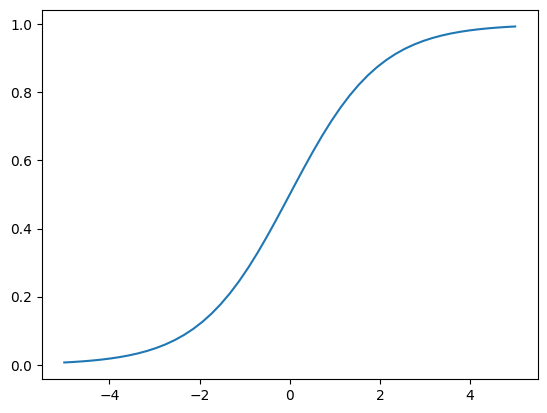

In [18]:
import matplotlib.pyplot as plt
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [19]:
#defining sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sig(x):
    return x*(1 - x)

def weights(num_input, hidden_layer_neurons, num_outputs):
    
    #weights between input and hidden layer
    w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
    #weights between hidden and output layer
    w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
    
    return w1, w2

In [20]:
def mlp(lr, hidden_layer_neurons):
    error = []
    
    w1, w2 = weights(num_inputs, hidden_layer_neurons, num_outputs)
    print("\nInitial weights of first layer : \n", w1)
    print("\nInitial weights of second layer : \n", w2)
    
    for epoch in range(1000):
        #FEED FORWARD
        # matrix multiplication between the input and the layer 1 weights fed into sigmoid function
        l1 = sigmoid(np.dot(X, w1))
        #second layer weight activtion
        l2 = sigmoid(np.dot(l1, w2))
        # average error of the batch
        er = (abs(y - l2)).mean()
        error.append(er)
        
        #BACKPROPAGATION
        # error on each weight on the second layer
        l2_delta = (y - l2)*der_sig(l2)
        # weight update on second layer
        w2 += l1.T.dot(l2_delta) * lr
    
        # error on each weight of the first layer
        l1_delta = l2_delta.dot(w2.T) * der_sig(l1)
        # udpate weights in the first layer
        w1 += X.T.dot(l1_delta) * lr
    
    print("\nWeights of second layer after backpropagation : \n", w2)
    print("\nWeights of first layer after backpropagation : \n", w1)
    print("\nFinal error : ", er)
    print("------------------------------------------------------------------------------")
    #plt.plot(error)
    return error, w1, w2
        
        

**Testing**

In [21]:
def test(w1, w2):
    X = test_data.values[:,:5]
    y = np.array([targets[int(x)] for x in test_data.values[:,5:6]])

    l1 = sigmoid(np.dot(X, w1))
    l2 = sigmoid(np.dot(l1, w2))

    yp = np.argmax(l2, axis=1) # prediction
    res = yp == np.argmax(y, axis=1)
    correct = np.sum(res)/len(res)

    testres = test_data[['species']].replace([0,1,2], ['Adelie','Gentoo', 'Chinstrap'])
    
    testres['Prediction'] = yp
    testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Adelie','Gentoo', 'Chinstrap'])
    
    print("\nComparison:\n")
    print(testres)
    print('Correct : ',sum(res),'/',len(res), '\nAccuracy :', (correct*100),'%')
    print("\n\nConfusion Matrix")
    print(confusion_matrix(testres['species'], testres['Prediction'],labels=['Adelie','Chinstrap','Gentoo']))
    
  
    return

<br>

### For learning rate = 0.2 and hidden_layer_neurons= 2


For learning rate = 0.2 and hidden_layer_neurons= 2

Initial weights of first layer : 
 [[ 0.75604951 -0.43121801]
 [-0.94175392 -0.86768432]
 [-0.05706774  0.36747963]
 [ 0.58081229 -0.46934267]
 [-0.04896041 -0.835449  ]]

Initial weights of second layer : 
 [[ 0.43308744  0.73539914 -0.2649941 ]
 [ 0.55895544  0.23786343 -0.20348045]]

Weights of second layer after backpropagation : 
 [[ -4.5828149    6.46699341  -4.69589655]
 [  3.8922146  -13.78111268  -3.55349107]]

Weights of first layer after backpropagation : 
 [[  1.13612268 -13.45029106]
 [ -9.45125666   5.72836878]
 [  2.82560905  -0.89803538]
 [  3.68739834   3.57578348]
 [ -4.66892852   0.50728688]]

Final error :  0.1239297207738514
------------------------------------------------------------------------------

Comparison:

       species Prediction
65      Adelie     Adelie
280  Chinstrap     Adelie
187     Gentoo     Gentoo
199     Gentoo     Gentoo
296  Chinstrap     Adelie
..         ...        ...
257     Gentoo   

Text(0.5, 0, 'Number of epoch')

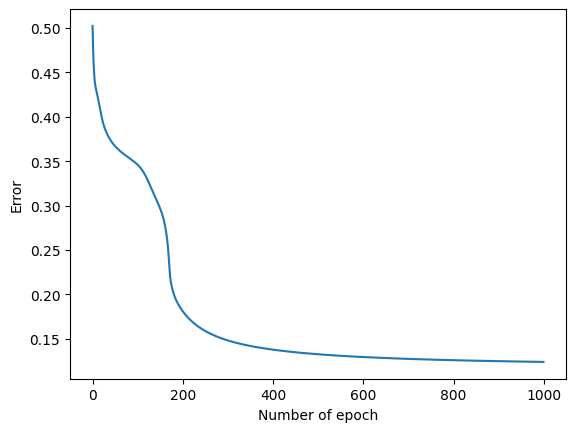

In [22]:
print("\nFor learning rate = 0.2 and hidden_layer_neurons= 2")
a, w1, w2 = mlp(lr = 0.05, hidden_layer_neurons= 2)
test(w1, w2)
plt.plot(a)
plt.ylabel("Error")
plt.xlabel("Number of epoch")

<br>

###For learning rate = 0.01 and hidden_layer_neurons= 3


For learning rate = 0.01 and hidden_layer_neurons= 3

Initial weights of first layer : 
 [[-0.3885486  -0.05529039 -0.39441925]
 [-0.09508516 -0.64018919 -0.53893575]
 [ 0.52805766 -0.59380777 -0.87404128]
 [ 0.79634366 -0.84089487 -0.27484455]
 [-0.12988634 -0.19435816  0.66379915]]

Initial weights of second layer : 
 [[-0.06140831 -0.37517203  0.61637459]
 [-0.11626769 -0.09351256 -0.93750937]
 [-0.10824005  0.98742906  0.28227931]]

Weights of second layer after backpropagation : 
 [[-3.54822402  4.71120891 -3.81087716]
 [-2.6262503  -5.87491904  2.60157734]
 [ 6.52862805 -3.32602259 -5.79683825]]

Weights of first layer after backpropagation : 
 [[ 0.26764877 -2.73077926 -8.4587771 ]
 [-5.40152885  3.0188883   4.17973404]
 [ 2.14998889 -1.50353617 -1.34267927]
 [ 2.14265097 -0.67112949  1.73454228]
 [-1.84510059  3.40480702  0.70890383]]

Final error :  0.0731494688506537
------------------------------------------------------------------------------

Comparison:

       species P

Text(0.5, 0, 'Number of epoch')

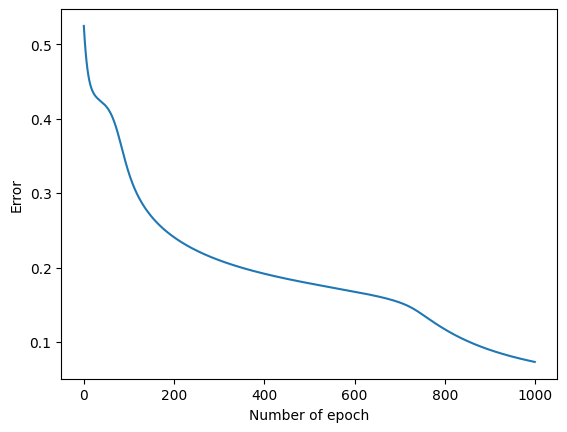

In [23]:
print("\nFor learning rate = 0.01 and hidden_layer_neurons= 3")
b, w1, w2 = mlp(lr = 0.01, hidden_layer_neurons = 3)
test(w1, w2)
plt.plot(b)
plt.ylabel("Error")
plt.xlabel("Number of epoch")

<br>

### For learning rate = 0.1 and hidden_layer_neurons= 5


For learning rate = 0.1 and hidden_layer_neurons= 5

Initial weights of first layer : 
 [[-0.82161266 -0.41648389 -0.8038719  -0.5335109   0.10811185]
 [ 0.36221976  0.05956938 -0.30779171  0.01047247  0.34876778]
 [-0.05302696 -0.64459279  0.49456256 -0.22891697 -0.8812464 ]
 [-0.58023209 -0.55406127  0.23303056  0.03545317  0.58519593]
 [ 0.45101583 -0.88019742 -0.72239754  0.50338581 -0.37845962]]

Initial weights of second layer : 
 [[ 0.70020716  0.09813098  0.45007801]
 [-0.86502583 -0.00440758 -0.11906795]
 [-0.97559104  0.64772704  0.87523001]
 [-0.90052345  0.50994942  0.41351339]
 [ 0.96668215  0.41583602  0.81765661]]

Weights of second layer after backpropagation : 
 [[ 9.36268026 -6.43732644 -6.19813455]
 [-2.77007603 -0.91825881  1.72953786]
 [-2.58726474  6.68172553 -7.48932043]
 [-5.53003622 -3.23277359  5.32797846]
 [ 8.1413309  -2.85913327 -8.75564777]]

Weights of first layer after backpropagation : 
 [[-11.34080715   1.70397007   0.07038962   0.21540947 -11.8501741

Text(0.5, 0, 'Number of epoch')

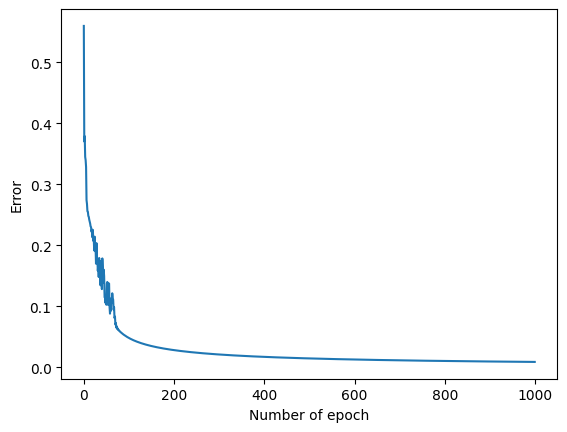

In [24]:
print("\nFor learning rate = 0.1 and hidden_layer_neurons= 5")
c, w1, w2 = mlp(lr = 0.1, hidden_layer_neurons = 5)
test(w1, w2)
plt.plot(c)
plt.ylabel("Error")
plt.xlabel("Number of epoch")

<br>

### Final Plot of errors

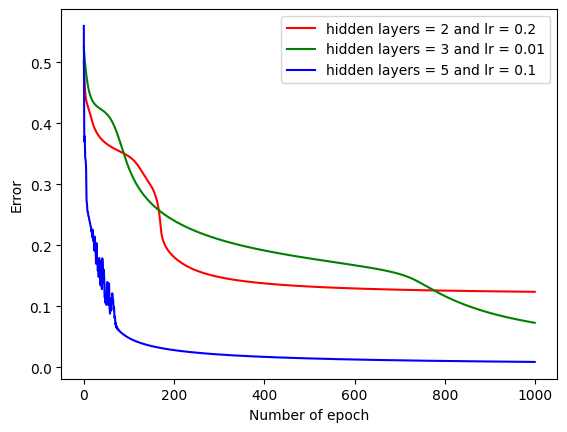

In [25]:
t = np.arange(0, 1000, 1)
plt.plot(t, a, color='r', label='hidden layers = 2 and lr = 0.2')
plt.plot(t, b, color='g', label='hidden layers = 3 and lr = 0.01')
plt.plot(t, c, color='b', label='hidden layers = 5 and lr = 0.1')
plt.ylabel("Error")
plt.xlabel("Number of epoch")
plt.legend()
plt.show()